UMBRALIZACION CON TECNICA ISODATA

THRESH_BINARY =
THRESH_BINARY_INV =

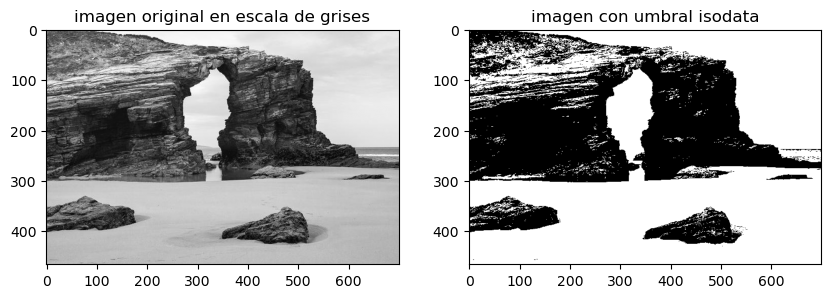

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isodata(imagen):
    umbral = 128
    while True:
        grupo1 = imagen[imagen<=umbral]
        grupo2 = imagen[imagen>=umbral]

        mediag1 = np.mean(grupo1)
        mediag2 = np.mean(grupo2)

        umbral_nuevo = (mediag1  + mediag2 ) / 2

        if abs(umbral_nuevo - umbral ) < 0.5:

            break
        umbral= umbral_nuevo
    return umbral

image = cv2.imread('2.png', 0)
umbral_isodata = isodata(image)

_, image_isodata = cv2.threshold(image,umbral_isodata,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('imagen original en escala de grises')

plt.subplot(1,2,2)
plt.imshow(image_isodata, cmap='gray')
plt.title('imagen con umbral isodata')
plt.show()





TECNICA DE LOS PICOS
falttern array de una dimension lo aplana

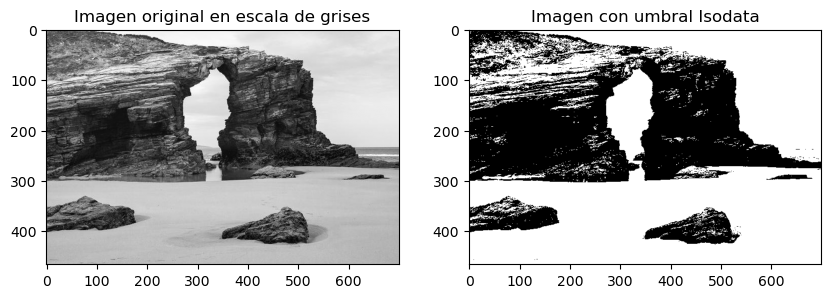

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dos_picos(imagen):
    hist = cv2.calcHist([imagen], [0], None, [256], [0, 256])
    
    pico = hist.flatten()

    pico_dif = np.diff(pico)

    primer_pico = np.argmax(pico_dif[:128])  
    segundo_pico = np.argmax(pico_dif[128:]) + 128  

    umbral_2picos = (primer_pico + segundo_pico) / 2

    return umbral_2picos

image = cv2.imread('2.png', 0)

umbral_2picos = dos_picos(image)

_, image_isodata = cv2.threshold(image, umbral_2picos, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(image_isodata, cmap='gray')
plt.title('Imagen con umbral Isodata')

plt.show()


METODO OTSU  CV2 

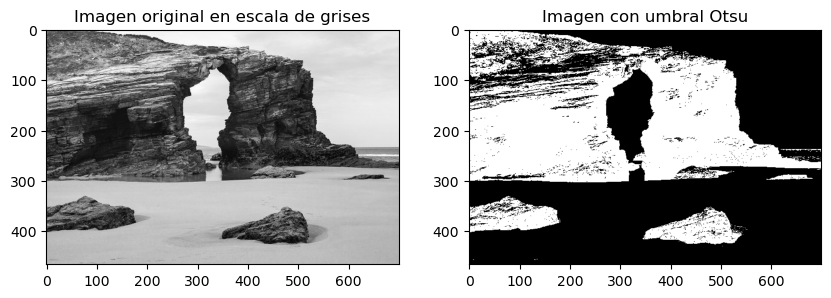

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('2.png', 0)
_, image_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

umbral_imagen = np.where(image > image_otsu, 255, 0).astype(np.uint8)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(umbral_imagen, cmap='gray')  
plt.title('Imagen con umbral Otsu')
plt.show()


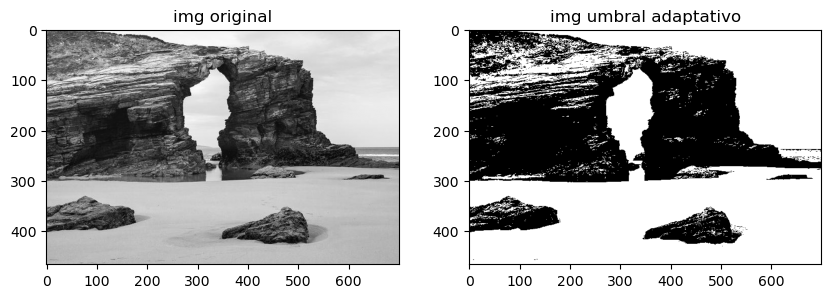

In [113]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
def tecnica_otsu(imagen):
    histo = cv2.calcHist([imagen],[0],None,[256],[0,256])
    histo_norm = histo.ravel()/histo.sum()
    Q = histo_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
 
    for i in range(1,256):
        p1,p2 = np.hsplit(histo_norm,[i]) 
        q1,q2 = Q[i],Q[255]-Q[i]
        if q1 < 1.e-6 or q2 < 1.e-6:
            continue
        b1,b2 = np.hsplit(bins,[i])
 
        m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
        v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
 
    img_otsu = imagen>=thresh
    return img_otsu
 
imagen = cv2.imread('2.png', 0)
umbral_OTSU = tecnica_otsu(imagen)
 
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('img original')
plt.imshow(imagen, cmap='gray')
 
plt.subplot(1,2,2)
plt.title('img umbral adaptativo')
plt.imshow(umbral_OTSU, cmap='gray')
 
plt.show()
 

UMBRALIZACION VISIBLE - PARTICION DE UNA IMAGEN

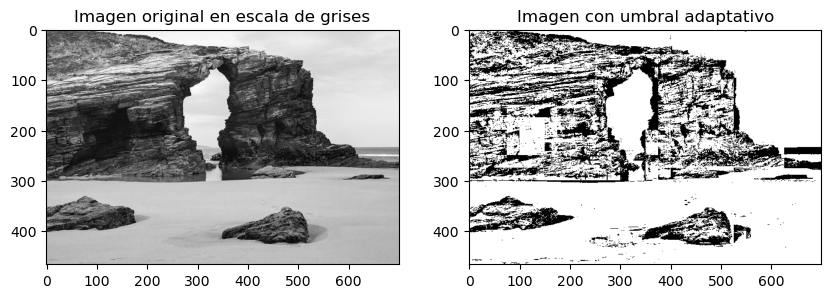

In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def variable_umb_blok(image, tam_blog, c):
    umbral_img = np.zeros_like(image)

    for y in range(0, image.shape[0], tam_blog):
        for x in range(0, image.shape[1], tam_blog):
            bloque = image[y:y + tam_blog, x:x + tam_blog]
            bloque_media = np.mean(bloque)
            umbral_adap = bloque_media - c
            umbral_img[y:y + tam_blog, x:x + tam_blog] = (bloque > umbral_adap) * 255

    return umbral_img

image = cv2.imread('2.png', 0)  
tam_blog = 25
c = 10

umbral_img_adap = variable_umb_blok(image, tam_blog, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(umbral_img_adap, cmap='gray')
plt.title('Imagen con umbral adaptativo')
plt.show()


CON DESVIACION

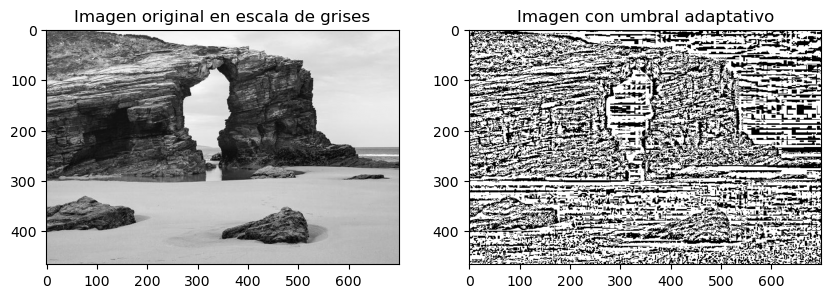

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def variable_umb_blok(image, tam_blog, ajuste):
    umbral_img = np.zeros_like(image)

    for y in range(0, image.shape[0], tam_blog):
        for x in range(0, image.shape[1], tam_blog):
            bloque = image[y:y + tam_blog, x:x + tam_blog]
            bloque_media = np.mean(bloque)
            des = np.std(bloque)
            umbral_adap = bloque_media - (ajuste*des)
            umbral_img[y:y + tam_blog, x:x + tam_blog] = (bloque > umbral_adap) * 255

    return umbral_img

image = cv2.imread('2.png', 0)  
tam_blog = 10
c = 0.3

umbral_img_adap = variable_umb_blok(image, tam_blog, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(umbral_img_adap, cmap='gray')
plt.title('Imagen con umbral adaptativo')
plt.show()

ADAPTATIVA CON VENTANA

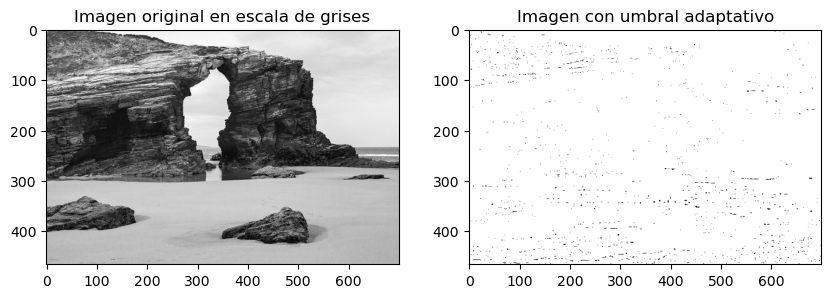

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ventana(image, ventana, factor):
    umbral_image = np.zeros_like(image)
    pad = ventana // 2
    padd_img = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            ventana_1 = padd_img[y:y + ventana, x:x + ventana]
            media = np.mean(ventana_1)
            dis = np.std(ventana_1)
            umbral = media - (factor * dis)
            umbral_image[y, x] = 255 if image[y, x] > umbral else 0  
    return umbral_image  

image = cv2.imread('2.png', 0)

tam_blog = 15  # Tiene que ser un número impar
c = 2

umbral_ventana = ventana(image, tam_blog, c)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(umbral_ventana, cmap='gray')
plt.title('Imagen con umbral adaptativo')
plt.show()


CON LIBRERIA CV2

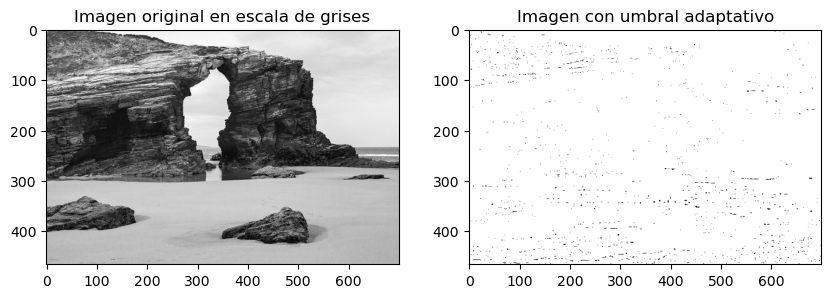

In [83]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('2.png', 0)
ventana = 7
factor = 3
image_umbr = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, ventana, factor)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen original en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(umbral_ventana, cmap='gray')
plt.title('Imagen con umbral adaptativo')
plt.show()

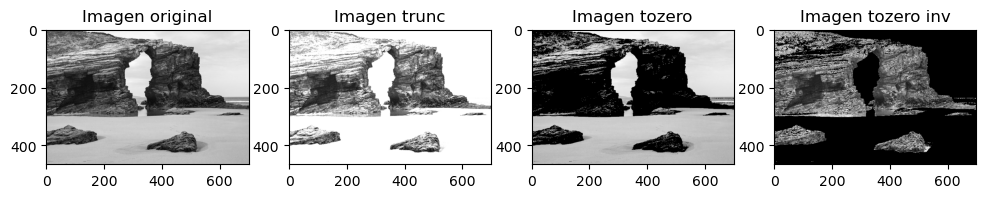

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('2.png', 0)

_, ubr_trunc = cv2.threshold(imagen, 127, 200, cv2.THRESH_TRUNC)
_, umbr_tozero = cv2.threshold(imagen, 127, 200, cv2.THRESH_TOZERO)
_, umbr_tozero_INV = cv2.threshold(imagen, 127, 200, cv2.THRESH_TOZERO_INV)

# Mostrar las imágenes resultantes
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen original')

plt.subplot(1, 4, 2)
plt.imshow(ubr_trunc, cmap='gray')
plt.title('Imagen trunc')

plt.subplot(1, 4, 3)
plt.imshow(umbr_tozero, cmap='gray')
plt.title('Imagen tozero')

plt.subplot(1, 4, 4)
plt.imshow(umbr_tozero_INV, cmap='gray')
plt.title('Imagen tozero inv')

plt.show()


Negativo de una imagen